#### Мажник Павел, 792

### ДЗ 3. Сравнение оценок. Эффективные оценки.
#### Задача 3. 
Рассмотрим $X_1, ..., X_n \sim Bern(\theta)$. По сетке значений $\theta \in
    [0, 1]$ с шагом 0.01 постройте график зависимости нижней оценки дисперсии
    произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$. Какой
    можно сделать вывод (напишите в комментариях)? Для каждого значения $\theta$
    (для той же сетки) сгенерируйте выборку размера $n=1000$ для параметра $\theta$,
    посчитайте эффективную оценку $\theta$ и бутстрепную оценку дисперсии
    (параметрический бутстреп, количество бутстрепных выборок равно $500$) этой
    эффективной оценки $\theta$. Нарисуйте график зависимости полученных бутстрепных
    оценок от $\theta$.

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

N = 1000
K = 500

Нижняя оценка дисперсии произвольной несмещенной оценки из неравенства Рао-Крамера равна $\frac{1}{I_X(\theta)}$.  
Для распределения $Bern(\theta)$ она равна $\frac{\theta (1 - \theta)}{N}.$  
По сетке значений $\theta \in [0, 1]$ с шагом 0.01 построим график зависимости нижней оценки дисперсии произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$.

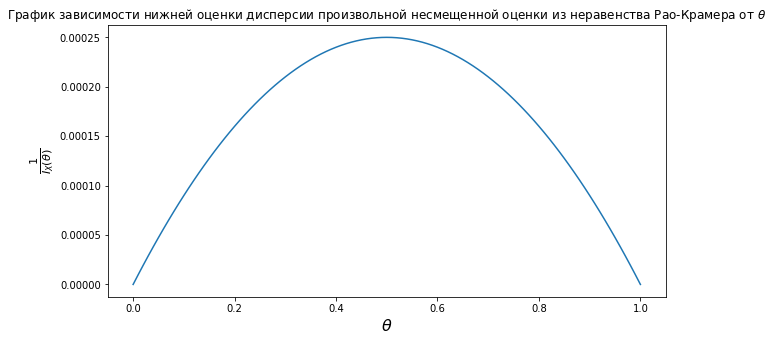

In [26]:
grid = np.linspace(0, 1, 101)
plt.figure(figsize=(10, 5))
plt.plot(grid, grid * (1 - grid) / N)
plt.title(r"График зависимости нижней оценки дисперсии произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$")
plt.xlabel(r"$\theta$", fontsize=16)
plt.ylabel(r"$\frac{1}{I_X(\theta)}$", fontsize=16)
plt.show()

Мы видим, что нижняя оценка дисперсии симметрична относительно $\theta = 0.5$. Следовательно, чем ближе будет вероятность хорошего исхода к 0.5, тем больше будет дисперсия оценки, а значит точность такой оценки будет наименьшей.

Для каждого значения $\theta$ сгенерируем выборку размера $n=1000$ для параметра $\theta$,
    посчитаем эффективную оценку $\theta = \overline{X}$ и бутстрепную оценку дисперсии.

In [27]:
def GetParamBootstrap(distr, sample, est_func):
    param_ests = est_func(sample)
    bootstrap_estimators = np.zeros(K)
    bootstrap_param_samples = distr(param_ests).rvs((K, N))
    for k in range(K):
        bootstrap_estimators[k] = est_func(bootstrap_param_samples[k])
    s = np.mean(bootstrap_estimators ** 2) - np.mean(bootstrap_estimators) ** 2
    return s

In [28]:
def theta1_est(sample):
    return np.mean(sample)

def bernoulli_bootstrap_est(theta):
    sample = sts.bernoulli.rvs(theta, size=N)
    
    def distr_1(theta):
        return sts.bernoulli(theta)

    theta1_param_s = GetParamBootstrap(distr_1, sample, theta1_est)
    return theta1_param_s

In [29]:
bernoulli_bootstrap_ests = []
for theta in grid:
    bernoulli_bootstrap_ests.append(bernoulli_bootstrap_est(theta))

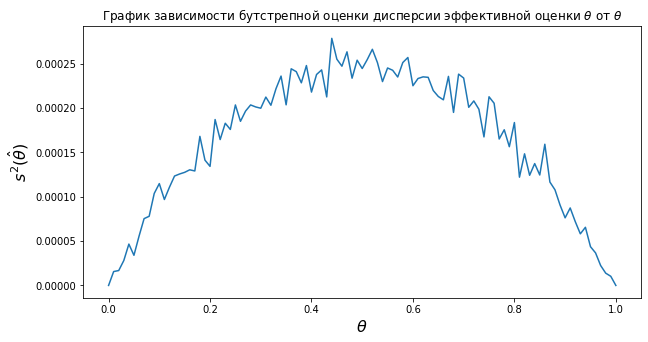

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(grid, bernoulli_bootstrap_ests)
plt.title(r"График зависимости бутстрепной оценки дисперсии эффективной оценки $\theta$ от $\theta$")
plt.xlabel(r"$\theta$", fontsize=16)
plt.ylabel(r"$s^2(\hat{\theta})$", fontsize=16)
plt.show()

Мы видим, что график бутстрепной оценки дисперсии эффективной оценки приближается к 
графику зависимости нижней оценки дисперсии произвольной несмещенной оценки.